In [69]:
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

In [70]:
# Señal cuadrada analítica
def senal_cuadrada(t, P):
    return signal.square(2 * np.pi * t / P, duty=0.5)
# Error cuadrático medio
def calcular_mse(senal_real, senal_aproximada):
    return np.mean((senal_real - senal_aproximada)**2)

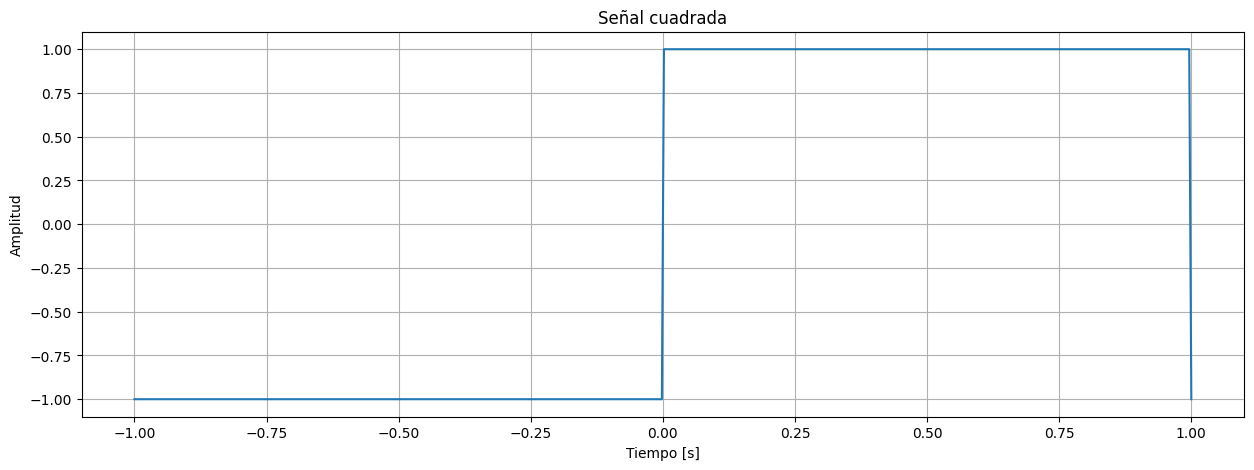

In [71]:
#gráfica de la señal cuadrada
P = 2
Nsample = 512
t = np.linspace(-1, 1, Nsample)
senal = senal_cuadrada(t, P)
plt.figure(figsize=(15, 5))
plt.plot(t, senal)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Señal cuadrada')
plt.grid()
plt.show()


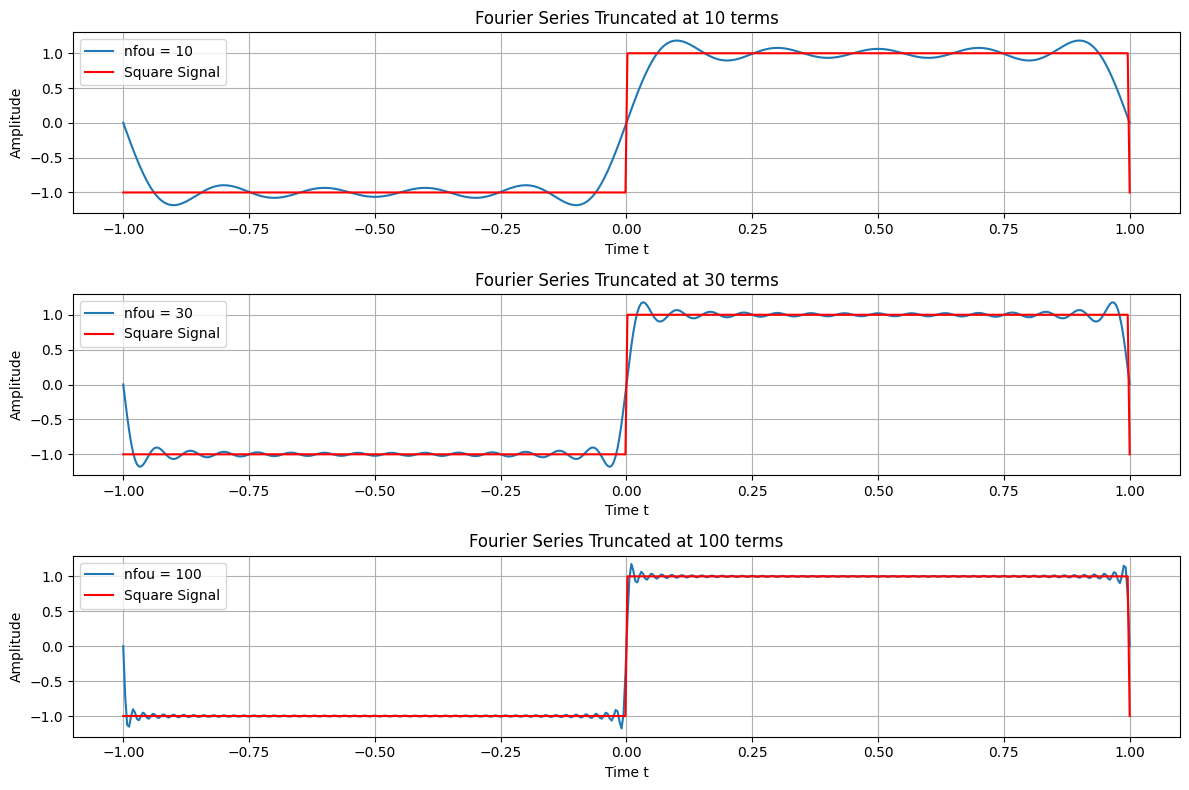

In [72]:
def square_signal_fourier(t, P, nfou):
    serie = np.zeros_like(t)
    for n in range(1, nfou + 1, 2):  # Solo sumamos para n = 1, 3, 5, ...
        coef = 4 / (n * np.pi)
        serie += coef * np.sin(2 * np.pi * n * t / P)
    return serie

# Define parameters
P = 2
Nsample = 512
t = np.linspace(-1, 1, Nsample)

# Evaluate Fourier series for different nfou
nfou_values = [10, 30, 100]
series_results = [square_signal_fourier(t, P, nfou) for nfou in nfou_values]

# Plot results
plt.figure(figsize=(12, 8))
for i, nfou in enumerate(nfou_values):
    plt.subplot(3, 1, i+1)
    plt.plot(t, series_results[i], label=f'nfou = {nfou}')
    plt.plot(t, senal_cuadrada(t, P), color='red', label='Square Signal')
    plt.title(f'Fourier Series Truncated at {nfou} terms')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [73]:
# Calcular el error cuadrático medio
mse_values = [calcular_mse(senal, serie) for serie in series_results]

In [74]:
mse_values

[0.04229492291155765, 0.01550770211169476, 0.006253270559774062]

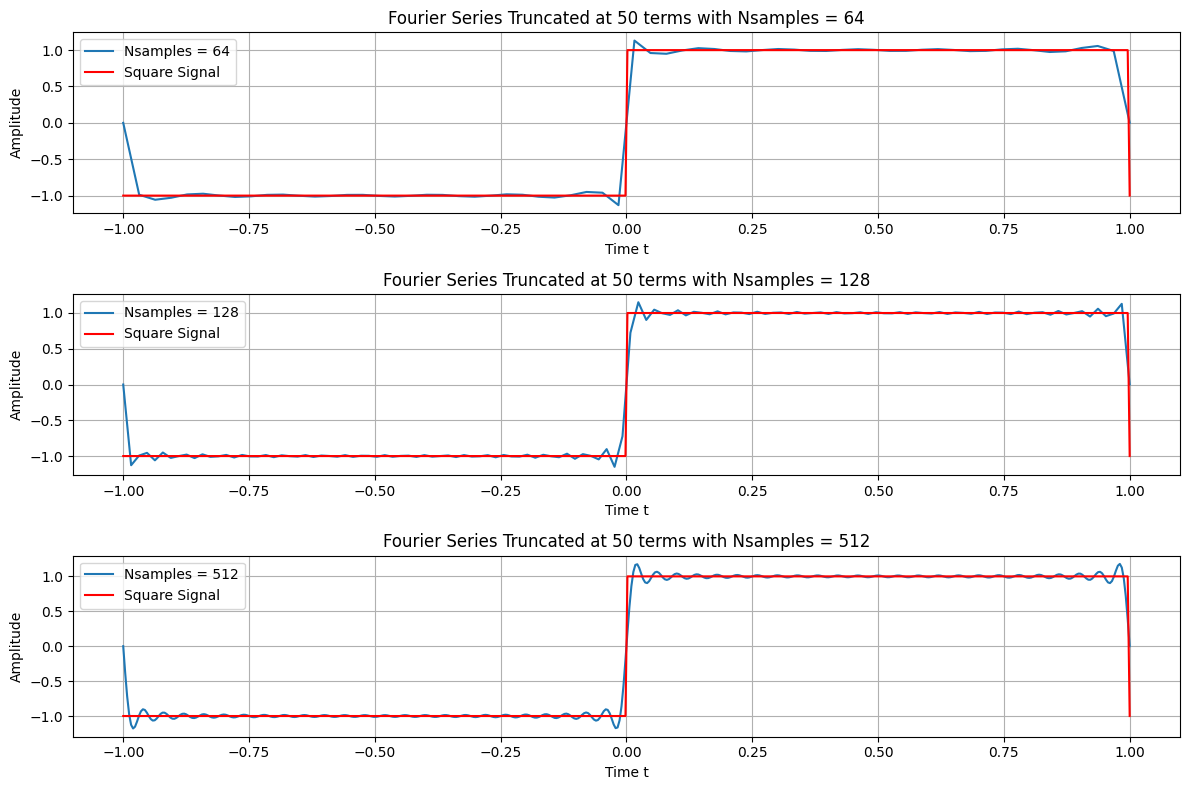

In [75]:
# Define parameters
P = 2
nfou = 50

# Define different sample sizes
Nsamples_values = [64, 128, 512]

# Evaluate the Fourier series for different Nsamples
series_results = []
t_values = []
for Nsamples in Nsamples_values:
    t = np.linspace(-1, 1, Nsamples)
    t_values.append(t)
    series_results.append(square_signal_fourier(t, P, nfou))

# Plot the results
plt.figure(figsize=(12, 8))
for i, Nsamples in enumerate(Nsamples_values):
    plt.subplot(3, 1, i+1)
    plt.plot(t_values[i], series_results[i], label=f'Nsamples = {Nsamples}')
    plt.plot(t, senal_cuadrada(t, P), color='red', label='Square Signal')
    plt.title(f'Fourier Series Truncated at {nfou} terms with Nsamples = {Nsamples}')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

El efecto de aliasing ocurre cuando una señal es muestreada a una frecuencia demasiado baja, lo que provoca que las altas frecuencias de la señal original se plieguen o se "aliasen" en frecuencias más bajas, distorsionando así la señal muestreada.

Para evitar el aliasing, el teorema de muestreo de Nyquist establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia máxima presente en la señal original. En el contexto de la serie de Fourier, esto significa que el número máximo de coeficientes de Fourier (específicamente, los términos de la serie) que se pueden utilizar antes de que ocurra aliasing está limitado por la frecuencia de muestreo.

### Paso 1: Determinación de la Frecuencia de Muestreo
Para \( Nsamples = 512 \) y un intervalo de tiempo \( t \) de \([-1, 1]\):

- La longitud total del intervalo es \(2\) unidades de tiempo.
- La frecuencia de muestreo \( f_s \) es \( \frac{Nsamples}{\text{duración del intervalo}} = \frac{512}{2} = 256 \) muestras por unidad de tiempo.

### Paso 2: Frecuencia Máxima
La frecuencia máxima que podemos representar sin aliasing es la mitad de la frecuencia de muestreo (frecuencia de Nyquist):

\[
f_{\text{Nyquist}} = \frac{f_s}{2} = 128 \text{ Hz}
\]

### Paso 3: Relación entre Coeficientes de Fourier y Frecuencia
El n-ésimo coeficiente de Fourier corresponde a una frecuencia de \( \frac{n}{P} \) Hz, donde \( P \) es el período de la señal.

Para evitar aliasing, la frecuencia del término de Fourier más alto debe ser menor o igual a la frecuencia de Nyquist:

\[
\frac{n_{\text{max}}}{P} \leq 128
\]

Dado que \( P = 2 \) en nuestro caso:

\[
n_{\text{max}} \leq 128 \times 2 = 256
\]

### Conclusión
Para evitar el aliasing, el número máximo de términos de la serie de Fourier que se pueden utilizar es \( n_{\text{max}} = 256 \). Sin embargo, como los términos de la serie de Fourier que consideramos son impares (1, 3, 5, ...), el número máximo de términos efectivamente utilizables sería:

\[
nfou_{\text{max}} = 255 \quad \text{(considerando solo términos impares hasta 255)}
\]

Esto significa que hasta 255 términos pueden ser usados en la serie de Fourier sin que se presente aliasing, considerando un muestreo con \( Nsamples = 512 \).

Si quieres realizar alguna simulación o visualización para confirmar este resultado, puedo ayudarte a implementarla.

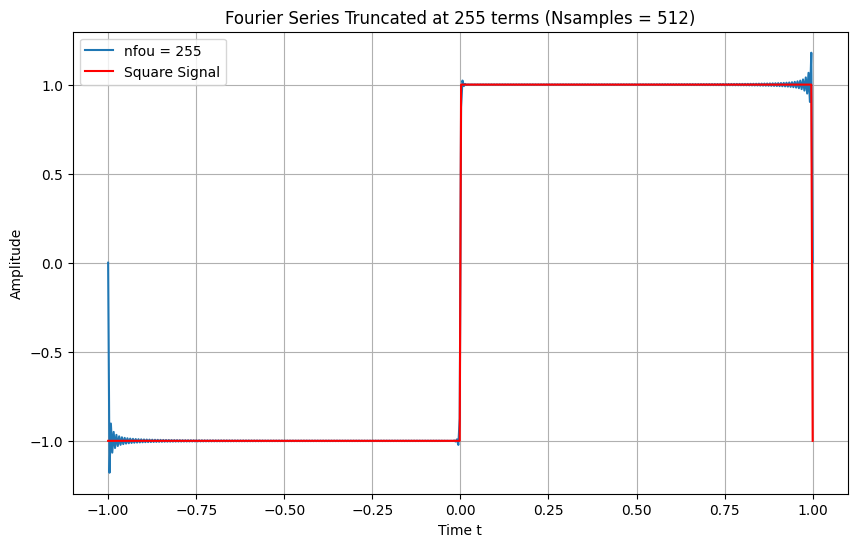

In [76]:
# Parameters
P = 2
Nsamples = 512
t = np.linspace(-1, 1, Nsamples)

# Determine the maximum number of coefficients before aliasing
nfou_max = 255  # Maximum number of odd terms before aliasing

# Evaluate the Fourier series using nfou_max
series_result = square_signal_fourier(t, P, nfou_max)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t, series_result, label=f'nfou = {nfou_max}')
plt.plot(t, senal_cuadrada(t, P), color='red', label='Square Signal')
plt.title(f'Fourier Series Truncated at {nfou_max} terms (Nsamples = {Nsamples})')
plt.xlabel('Time t')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

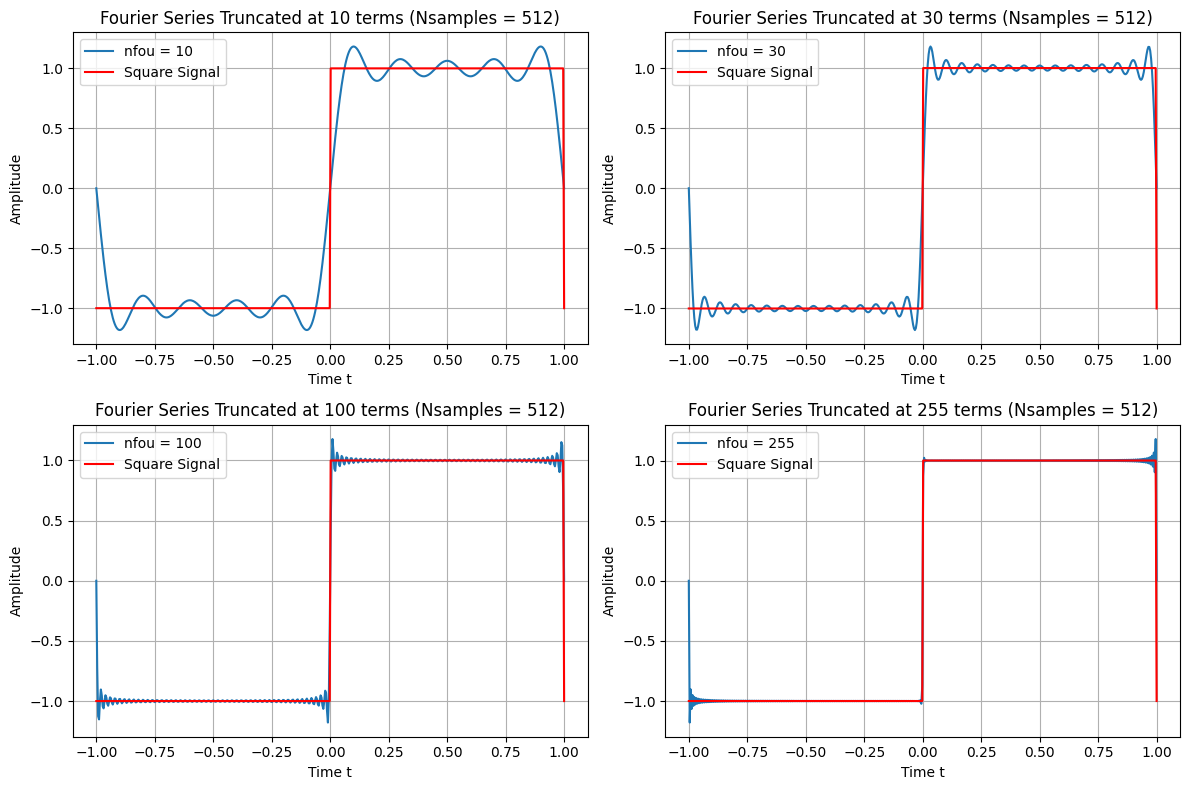

In [77]:
# Parameters
P = 2
Nsamples = 512
t = np.linspace(-1, 1, Nsamples)

# Determine the maximum number of coefficients before aliasing
nfou_max_values = [10, 30, 100, 255]  # Maximum number of odd terms before aliasing

# Evaluate the Fourier series using nfou_max
series_results = [square_signal_fourier(t, P, nfou_max) for nfou_max in nfou_max_values]

# Plot the results
plt.figure(figsize=(12, 8))
for i, nfou_max in enumerate(nfou_max_values):
    plt.subplot(2, 2, i+1)
    plt.plot(t, series_results[i], label=f'nfou = {nfou_max}')
    plt.plot(t, senal_cuadrada(t, P), color='red', label='Square Signal')
    plt.title(f'Fourier Series Truncated at {nfou_max} terms (Nsamples = {Nsamples})')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


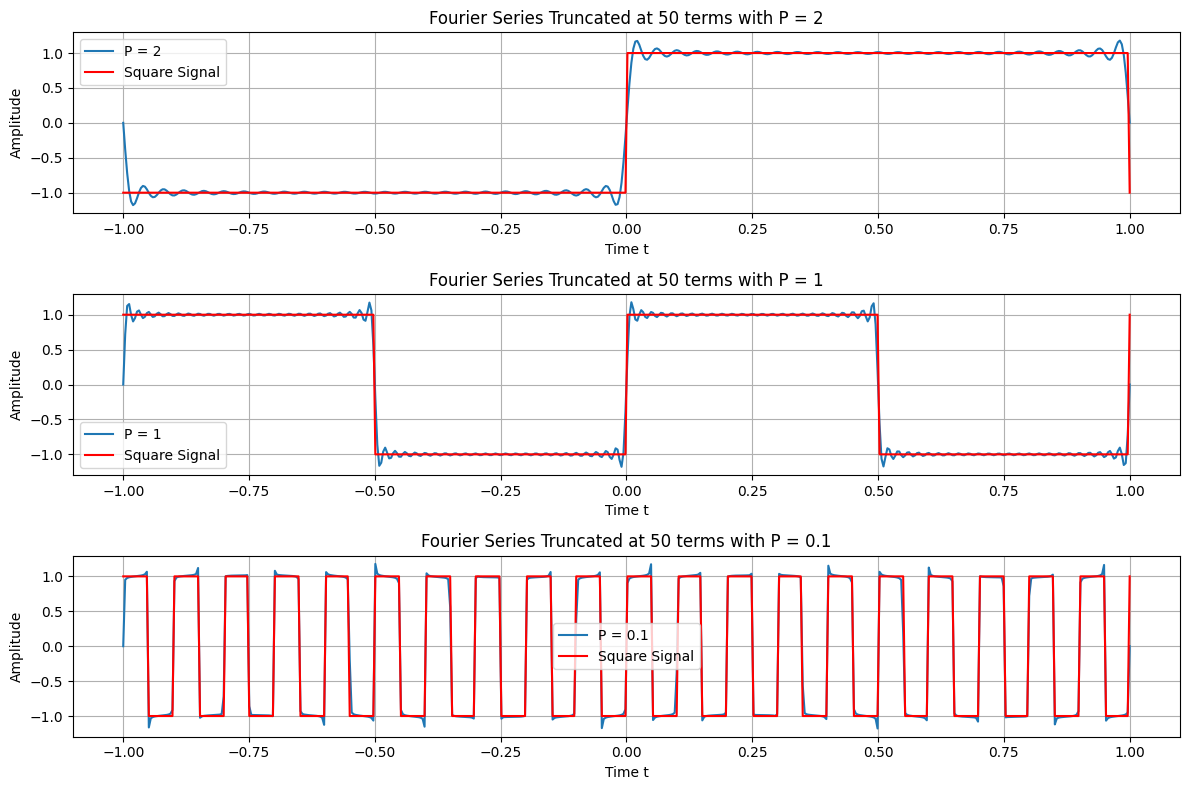

In [78]:
# Define parameters
nfou = 50
Nsamples = 512
t = np.linspace(-1, 1, Nsamples)

# Define different values of P
P_values = [2, 1, 0.1]

# Evaluate the Fourier series for different values of P
series_results = []
for P in P_values:
    series_results.append(square_signal_fourier(t, P, nfou))

serie = []
for P in P_values:
    serie.append(senal_cuadrada(t, P))

# Plot the results
plt.figure(figsize=(12, 8))
for i, P in enumerate(P_values):
    plt.subplot(3, 1, i+1)
    plt.plot(t, series_results[i], label=f'P = {P}')
    plt.plot(t, serie[i], color='red', label='Square Signal')
    plt.title(f'Fourier Series Truncated at {nfou} terms with P = {P}')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [79]:
mse_values = [calcular_mse(senal, serie) for serie in series_results]
mse_values

[0.010169382571701559, 1.9891854477166597, 1.982322632654021]

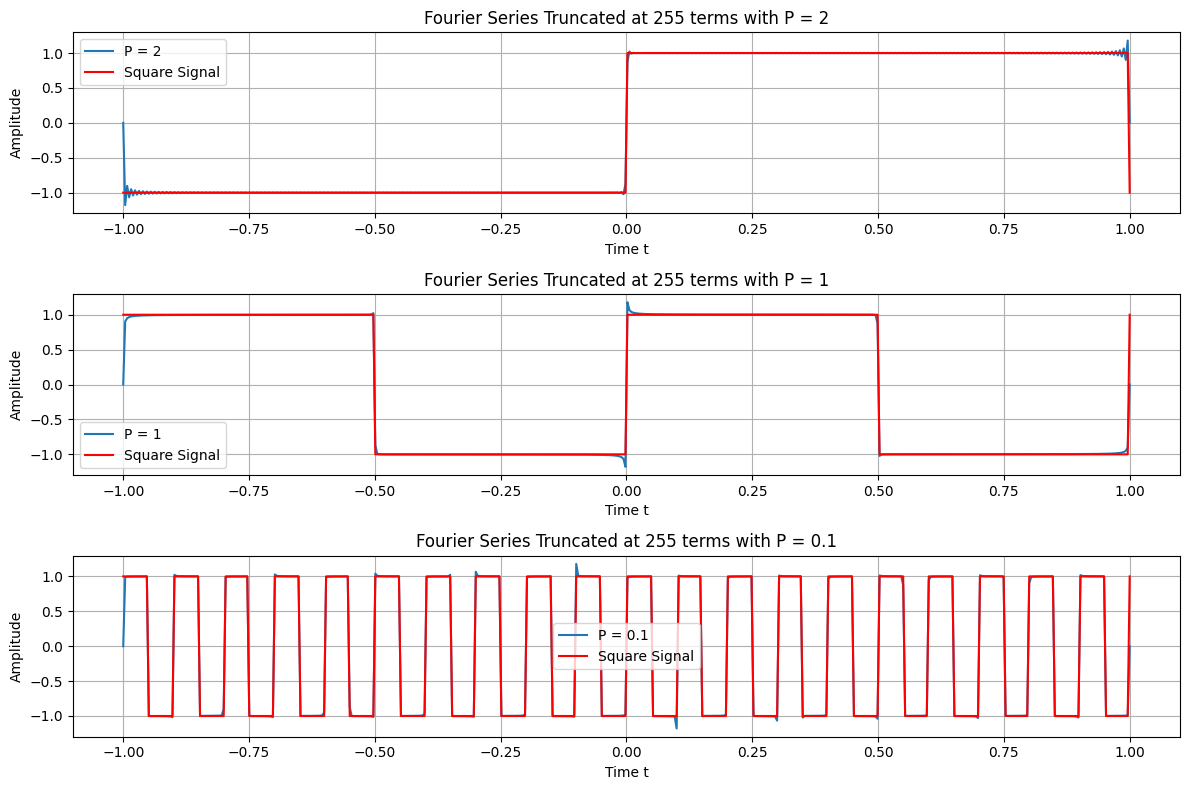

In [84]:
# Define parameters
nfou = 255
Nsamples = 512
t = np.linspace(-1, 1, Nsamples)

# Define different values of P
P_values = [2, 1, 0.1]

# Evaluate the Fourier series for different values of P
series_results = []
for P in P_values:
    series_results.append(square_signal_fourier(t, P, nfou))

serie = []
for P in P_values:
    serie.append(senal_cuadrada(t, P))

# Plot the results
plt.figure(figsize=(12, 8))
for i, P in enumerate(P_values):
    plt.subplot(3, 1, i+1)
    plt.plot(t, series_results[i], label=f'P = {P}')
    plt.plot(t, serie[i], color='red', label='Square Signal')
    plt.title(f'Fourier Series Truncated at {nfou} terms with P = {P}')
    plt.xlabel('Time t')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [85]:
mse_values = [calcular_mse(senal, serie) for serie in series_results]
mse_values

[0.004194793213588048, 1.980238903468966, 1.9936315772852482]

In [ ]:
[   94793213588048, 1.980238903468966, 1.9936315772852482]